In [1]:
import numpy as np
import matplotlib.pylab as plt
import matplotlib.animation as animation 

In [3]:
def sum_neigbors_dead_wall(X,i,j):
    lsum = 0
    h, w = X.shape
    for ii in [-1,0,1]:
        for jj in [-1,0,1]:
            if ii == 0 and jj == 0:
                continue
            if i+ii < 0 or j+jj < 0 or i+ii >= h or j+jj >= w:
                continue
            lsum += X[i+ii, j+jj]
    return lsum


def life_choice(state, neighbors):
    if state == 1:
        if neighbors < 2 or neighbors > 3:
            return 0
    else:
        if neighbors == 3:
            return 1
    
    return state
    

def life_step(X_old):
    h, w = X_old.shape
    X_new = np.zeros_like(X_old)
    
    for i in range(h):
        for j in range(w):
            X_new[i,j] = life_choice(X_old[i,j], sum_neigbors_dead_wall(X_old,i,j))
    return X_new


blinker = np.zeros((5,5))
blinker[2,1:4] = 1

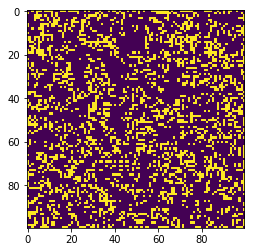

In [5]:
X = np.random.choice([0,1], (100,100))

fig = plt.figure()
im = plt.imshow(X)

def updatefig(*args):
    global X
    X = life_step(X)
    im.set_array(X)
    return im

ani = animation.FuncAnimation(fig, updatefig, interval=50)
plt.show()